<a href="https://colab.research.google.com/github/VMW75/DataScience_ML-PROJECT/blob/main/ML_of_Linear_Regressor_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
dataset = pd.read_csv('/content/drive/MyDrive/project01/50_Startups.csv')

In [51]:
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
dataset.shape

(50, 5)

In [53]:
len(dataset)

50

In [54]:
dataset.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [55]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

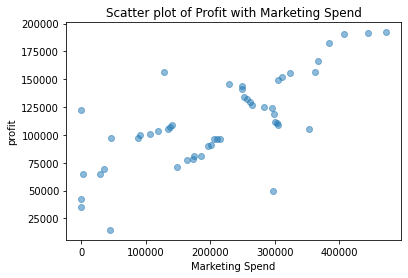

In [56]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('profit')
plt.show()

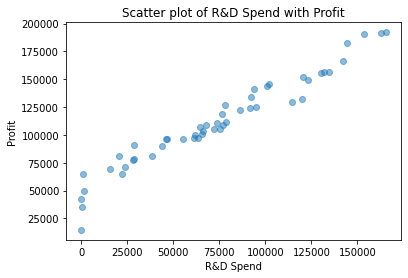

In [57]:


plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of R&D Spend with Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

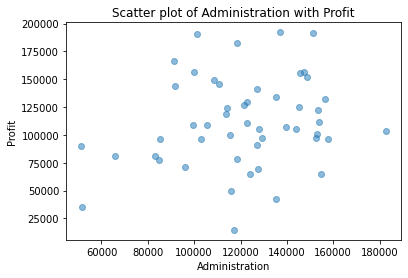

In [58]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Administration with Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

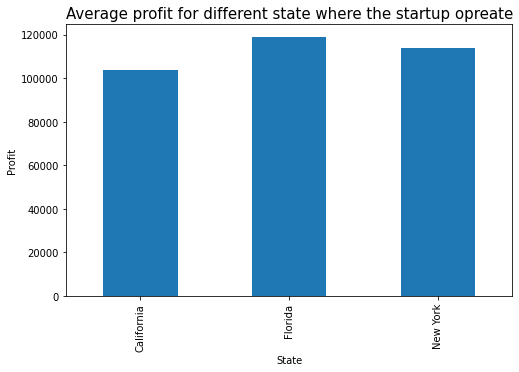

In [59]:
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (8,5), fontsize = 10 )
ax.set_title("Average profit for different state where the startup opreate", fontsize = 15)
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Profit', fontsize = 10)
plt.show()


In [60]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [61]:
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)
dataset.drop(columns=['State'],axis=1, inplace=True)

In [62]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [63]:
dependent_variable='Profit'

In [64]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [65]:
print(set(dataset.columns.tolist()))
print(dependent_variable)

{'NewYork_State', 'Marketing Spend', 'Profit', 'Administration', 'California_State', 'R&D Spend', 'Florida_State'}
Profit


In [66]:
independent_variables

['NewYork_State',
 'Marketing Spend',
 'Administration',
 'California_State',
 'R&D Spend',
 'Florida_State']

In [67]:
x = dataset[independent_variables].values
y = dataset[dependent_variable].values

In [68]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [69]:
x

array([[1.0000000e+00, 4.7178410e+05, 1.3689780e+05, 0.0000000e+00,
        1.6534920e+05, 0.0000000e+00],
       [0.0000000e+00, 4.4389853e+05, 1.5137759e+05, 1.0000000e+00,
        1.6259770e+05, 0.0000000e+00],
       [0.0000000e+00, 4.0793454e+05, 1.0114555e+05, 0.0000000e+00,
        1.5344151e+05, 1.0000000e+00],
       [1.0000000e+00, 3.8319962e+05, 1.1867185e+05, 0.0000000e+00,
        1.4437241e+05, 0.0000000e+00],
       [0.0000000e+00, 3.6616842e+05, 9.1391770e+04, 0.0000000e+00,
        1.4210734e+05, 1.0000000e+00],
       [1.0000000e+00, 3.6286136e+05, 9.9814710e+04, 0.0000000e+00,
        1.3187690e+05, 0.0000000e+00],
       [0.0000000e+00, 1.2771682e+05, 1.4719887e+05, 1.0000000e+00,
        1.3461546e+05, 0.0000000e+00],
       [0.0000000e+00, 3.2387668e+05, 1.4553006e+05, 0.0000000e+00,
        1.3029813e+05, 1.0000000e+00],
       [1.0000000e+00, 3.1161329e+05, 1.4871895e+05, 0.0000000e+00,
        1.2054252e+05, 0.0000000e+00],
       [0.0000000e+00, 3.0498162e+05,

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [71]:
x_train[0:10]

array([[0.0000000e+00, 2.1463481e+05, 1.0305749e+05, 0.0000000e+00,
        5.5493950e+04, 1.0000000e+00],
       [1.0000000e+00, 2.0551764e+05, 8.5047440e+04, 0.0000000e+00,
        4.6014020e+04, 0.0000000e+00],
       [0.0000000e+00, 1.3405007e+05, 1.4413598e+05, 0.0000000e+00,
        7.5328870e+04, 1.0000000e+00],
       [0.0000000e+00, 2.1079767e+05, 1.5769392e+05, 1.0000000e+00,
        4.6426070e+04, 0.0000000e+00],
       [0.0000000e+00, 2.9491957e+05, 1.1417579e+05, 0.0000000e+00,
        9.1749160e+04, 1.0000000e+00],
       [0.0000000e+00, 3.2387668e+05, 1.4553006e+05, 0.0000000e+00,
        1.3029813e+05, 1.0000000e+00],
       [0.0000000e+00, 2.5651292e+05, 1.5654742e+05, 0.0000000e+00,
        1.1994324e+05, 1.0000000e+00],
       [1.0000000e+00, 1.9039300e+03, 1.2415304e+05, 0.0000000e+00,
        1.0002300e+03, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.1743150e+04, 0.0000000e+00,
        5.4205000e+02, 0.0000000e+00],
       [1.0000000e+00, 1.0713838e+05,

In [72]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [73]:
regressor.intercept_

42467.52924855308

In [74]:
regressor.coef_

array([ 7.86007422e+02,  3.66100259e-02,  3.28845975e-02,  8.66383692e+01,
        7.73467193e-01, -8.72645791e+02])

In [75]:
y_pred_train = regressor.predict(x_train)

In [76]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [77]:
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [78]:
y_pred = regressor.predict(x_test)

In [79]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [80]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [81]:
mean_squared_error(y_test, y_pred)

83502864.03257641

In [82]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [83]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794891

In [84]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [85]:
r2_score(y_test, y_pred)

0.9347068473282433

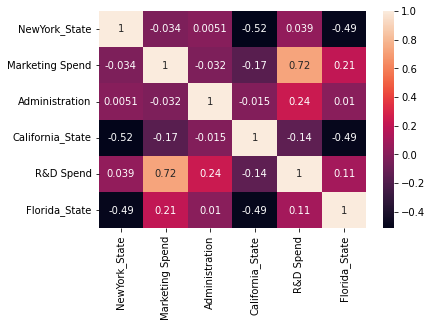

In [86]:
predictors = dataset[independent_variables]
ax = sns.heatmap(predictors.corr(), annot=True)

In [87]:
predictors.drop(columns=['Marketing Spend'],axis=1,inplace=True)

<ipython-input-87-dc6899684809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors.drop(columns=['Marketing Spend'],axis=1,inplace=True)


In [88]:
x = predictors.values
y = dataset[dependent_variable].values

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [91]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred = regressor.predict(x_test)


In [96]:
y_pred

array([104869.7188236 , 134022.38515532, 135532.16703051,  72539.51243001,
       179430.51003079, 109808.57354528,  65733.61574675, 100423.18961895,
       111735.6946293 , 169794.72714131])

In [97]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [98]:
math.sqrt(mean_squared_error(y_test, y_pred))

8178.3692148524515

In [99]:
r2_score(y_test, y_pred)

0.9477002402858979